# DBSCAN


###### Stands for Density Based Spatial Clustering for Applications with Noise

###### The primary advantage is that we don't need to provide the no. of clusters; however, we do need to provide two hyperparameters : eps (epsillon) and min_samples(n). Unlike, k-means, DBSCAN can captrure clusters of complex shapes like spirals.

##### The algorithim: 1) starts by picking a random point, x0, and then cheses all points that are within epsillon of x0. If there are less than n points, then this point is labeled as noise and another point is chosen. Else, if the no. of points are greater or equal to n, then the point is labeled as a core point.    2) All the members within this epsillon neighbourhood are visited and and then find all the episillon neighbors of each member and add them to the cluster.    3) You continue expanding the cluster till there are no more examples to put in it.    4) Then, you pick from the dataset a point that does not belong to this starting cluster and repeat this process.

The hyperparameter eps is somewhat more important, as it determines what it means for
points to be “close.” Setting eps to be very small will mean that no points are core
samples, and may lead to all points being labeled as noise. Setting eps to be very large
will result in all points forming a single cluster.

The min_samples setting mostly determines whether points in less dense regions will
be labeled as outliers or as their own clusters. If you decrease min_samples, anything
that would have been a cluster with less than min_samples many samples will now be
labeled as noise. min_samples therefore determines the minimum cluster size.

Finding a good setting for eps is
sometimes easier after scaling the data using StandardScaler or MinMaxScaler, as
using these scaling techniques will ensure that all features have similar ranges.

Let us apply this to the two_moons dataset:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

Text(0, 0.5, 'Feature 1')

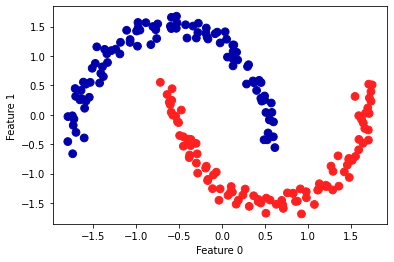

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

from sklearn.preprocessing import StandardScaler
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

DBSCAN correctly classifies the two clusters which could not be done by k-maens. The value of eps = 0.5